# Exploratory Data Analysis of 2022 State Election Results

* [Election Commission of India](https://results.eci.gov.in/)

State | Total Constituencies | Min for Majorty
--- | --- | ---
Uttar Pradesh | 403 | 202
Goa | 40 | 21
Manipur | 60 | 31 
Punjab | 117 | 59
Uttar Khand | 70 | 36

## Extracting data from the official page using bs4

In [1]:
import pandas as pd
from urllib.request import urlopen
from bs4 import BeautifulSoup

In [2]:
url = "https://results.eci.gov.in/ResultAcGenMar2022/partywiseresult-S24.htm"
html = urlopen(url)
soup = BeautifulSoup(html,'html.parser')
body = soup.body
div = body.find("div", {"id": "div1"})
table = div.find("table",{"border":"1"})
rows = table.find_all('tr')

In [4]:
raw_data = []
for i in range (3,len(rows)-1):
    tds = rows[i].findAll('td')
    raw_data.append([])
    for td in tds:
        raw_data[len(raw_data)-1].append(td.text)
    raw_data[len(raw_data)-1][len(raw_data[len(raw_data)-1])-2] = int(raw_data[len(raw_data)-1][len(raw_data[len(raw_data)-1])-2])
data = sorted(raw_data, key=lambda x: x[len(raw_data[0])-2],reverse=True)
data

[['Apna Dal (Soneylal)', '12', 0, '12'],
 ['Bahujan Samaj Party', '1', 0, '1'],
 ['Bharatiya Janata Party', '255', 0, '255'],
 ['Indian National Congress', '2', 0, '2'],
 ['Jansatta Dal Loktantrik', '2', 0, '2'],
 ['Nirbal Indian Shoshit Hamara Aam Dal', '6', 0, '6'],
 ['Rashtriya Lok Dal', '8', 0, '8'],
 ['Samajwadi Party', '111', 0, '111'],
 ['Suheldev Bharatiya Samaj Party', '6', 0, '6']]

In [5]:
header = ['Party', 'Won', 'Leading', 'Total']
header

['Party', 'Won', 'Leading', 'Total']

In [6]:
from tabulate import tabulate

In [7]:
print(tabulate(data, headers=header, tablefmt='fancy_grid'))

╒══════════════════════════════════════╤═══════╤═══════════╤═════════╕
│ Party                                │   Won │   Leading │   Total │
╞══════════════════════════════════════╪═══════╪═══════════╪═════════╡
│ Apna Dal (Soneylal)                  │    12 │         0 │      12 │
├──────────────────────────────────────┼───────┼───────────┼─────────┤
│ Bahujan Samaj Party                  │     1 │         0 │       1 │
├──────────────────────────────────────┼───────┼───────────┼─────────┤
│ Bharatiya Janata Party               │   255 │         0 │     255 │
├──────────────────────────────────────┼───────┼───────────┼─────────┤
│ Indian National Congress             │     2 │         0 │       2 │
├──────────────────────────────────────┼───────┼───────────┼─────────┤
│ Jansatta Dal Loktantrik              │     2 │         0 │       2 │
├──────────────────────────────────────┼───────┼───────────┼─────────┤
│ Nirbal Indian Shoshit Hamara Aam Dal │     6 │         0 │       6 │
├─────

In [8]:
df = pd.DataFrame(data = data, columns = header)
df

,Party,Won,Leading,Total
0,Apna Dal (Soneylal),12,0,12
1,Bahujan Samaj Party,1,0,1
2,Bharatiya Janata Party,255,0,255
3,Indian National Congress,2,0,2
4,Jansatta Dal Loktantrik,2,0,2
5,Nirbal Indian Shoshit Hamara Aam Dal,6,0,6
6,Rashtriya Lok Dal,8,0,8
7,Samajwadi Party,111,0,111
8,Suheldev Bharatiya Samaj Party,6,0,6


In [9]:
df.to_csv('data.csv', index=False)

In [10]:
df.to_json('data.json', orient=None)

## Importing the csv file and visualizing the extracted data

In [11]:
import pandas as pd
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns

In [12]:
csv_data = pd.read_csv('data.csv')
csv_data

,Party,Won,Leading,Total
0,Apna Dal (Soneylal),12,0,12
1,Bahujan Samaj Party,1,0,1
2,Bharatiya Janata Party,255,0,255
3,Indian National Congress,2,0,2
4,Jansatta Dal Loktantrik,2,0,2
5,Nirbal Indian Shoshit Hamara Aam Dal,6,0,6
6,Rashtriya Lok Dal,8,0,8
7,Samajwadi Party,111,0,111
8,Suheldev Bharatiya Samaj Party,6,0,6


In [13]:
csv_data = csv_data.groupby('Party')['Won'].sum().sort_values(ascending=False) 
csv_data

Party
Bharatiya Janata Party                  255
Samajwadi Party                         111
Apna Dal (Soneylal)                      12
Rashtriya Lok Dal                         8
Nirbal Indian Shoshit Hamara Aam Dal      6
Suheldev Bharatiya Samaj Party            6
Indian National Congress                  2
Jansatta Dal Loktantrik                   2
Bahujan Samaj Party                       1
Name: Won, dtype: int64

In [14]:
csv_data = csv_data.reset_index()
csv_data

,Party,Won
0,Bharatiya Janata Party,255
1,Samajwadi Party,111
2,Apna Dal (Soneylal),12
3,Rashtriya Lok Dal,8
4,Nirbal Indian Shoshit Hamara Aam Dal,6
5,Suheldev Bharatiya Samaj Party,6
6,Indian National Congress,2
7,Jansatta Dal Loktantrik,2
8,Bahujan Samaj Party,1


In [15]:
csv_data.columns = ['Party' ,'Seats']
csv_data

,Party,Seats
0,Bharatiya Janata Party,255
1,Samajwadi Party,111
2,Apna Dal (Soneylal),12
3,Rashtriya Lok Dal,8
4,Nirbal Indian Shoshit Hamara Aam Dal,6
5,Suheldev Bharatiya Samaj Party,6
6,Indian National Congress,2
7,Jansatta Dal Loktantrik,2
8,Bahujan Samaj Party,1


(array([0, 1, 2, 3, 4, 5, 6, 7, 8]),
 [Text(0, 0, 'Bharatiya Janata Party'),
  Text(1, 0, 'Samajwadi Party'),
  Text(2, 0, 'Apna Dal (Soneylal)'),
  Text(3, 0, 'Rashtriya Lok Dal'),
  Text(4, 0, 'Nirbal Indian Shoshit Hamara Aam Dal'),
  Text(5, 0, 'Suheldev Bharatiya Samaj Party'),
  Text(6, 0, 'Indian National Congress'),
  Text(7, 0, 'Jansatta Dal Loktantrik'),
  Text(8, 0, 'Bahujan Samaj Party')])

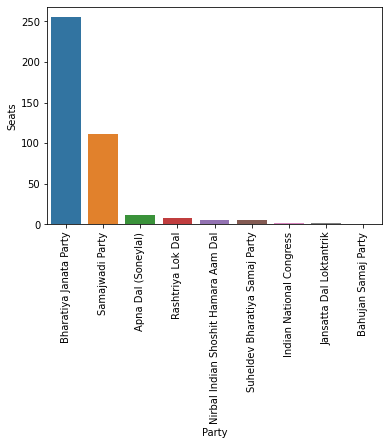

In [16]:
sns.barplot(data=csv_data, x='Party', y='Seats')
plt.xticks(rotation=90)

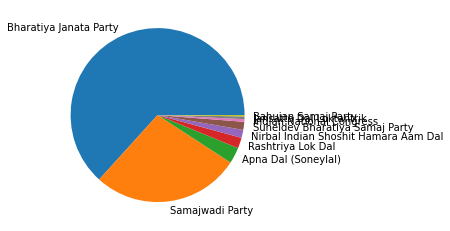

In [17]:
plt.pie(csv_data["Seats"], labels=csv_data["Party"])
plt.show()

## Extracting all the five state

In [18]:
import pandas as pd
from urllib.request import urlopen
from bs4 import BeautifulSoup
from tabulate import tabulate


header = ['Party', 'Won', 'Leading', 'Total']
states = { 'Uttar-Pradesh' : 'S24', 'Goa' : 'S05', 'Mainpur' : 'S14', 'Punjab' : 'S19', 'Uttar-Khand' : 'S28' }


def extract(input_states):
    for state in input_states:
        print("Extracting data for", state, ":", input_states[state])
        try:
            url = "https://results.eci.gov.in/ResultAcGenMar2022/partywiseresult-" +  input_states[state] + ".htm"
            print("Fetching ", url)
            html = urlopen(url)
            soup = BeautifulSoup(html,'html.parser')
            body = soup.body
            div = body.find("div", {"id": "div1"})
            table = div.find("table",{"border":"1"})
            rows = table.find_all('tr')
            raw_data = []
            for i in range (3,len(rows)-1):
                tds = rows[i].findAll('td')
                raw_data.append([])
                for td in tds:
                    raw_data[len(raw_data)-1].append(td.text)
                raw_data[len(raw_data)-1][len(raw_data[len(raw_data)-1])-2] = int(raw_data[len(raw_data)-1][len(raw_data[len(raw_data)-1])-2])
            data = sorted(raw_data, key=lambda x: x[len(raw_data[0])-2],reverse=True)
            print("Data fetched successfully")
            print(tabulate(data, headers=header, tablefmt='fancy_grid'))
            df = pd.DataFrame(data = data, columns = header)
            filename = state + ".csv"
            print("Saving parsed data as", filename, end='\n\n')
            df.to_csv(filename, index=False)
        except e:
            print(e)


extract(states)

Extracting data for Uttar-Pradesh : S24
Fetching  https://results.eci.gov.in/ResultAcGenMar2022/partywiseresult-S24.htm
Data fetched successfully
╒══════════════════════════════════════╤═══════╤═══════════╤═════════╕
│ Party                                │   Won │   Leading │   Total │
╞══════════════════════════════════════╪═══════╪═══════════╪═════════╡
│ Apna Dal (Soneylal)                  │    12 │         0 │      12 │
├──────────────────────────────────────┼───────┼───────────┼─────────┤
│ Bahujan Samaj Party                  │     1 │         0 │       1 │
├──────────────────────────────────────┼───────┼───────────┼─────────┤
│ Bharatiya Janata Party               │   255 │         0 │     255 │
├──────────────────────────────────────┼───────┼───────────┼─────────┤
│ Indian National Congress             │     2 │         0 │       2 │
├──────────────────────────────────────┼───────┼───────────┼─────────┤
│ Jansatta Dal Loktantrik              │     2 │         0 │       2 │
├─

## Visualizing all the five states

Visualizing data for Uttar-Pradesh : S24
Importing Uttar-Pradesh.csv
                                  Party  Seats
0                Bharatiya Janata Party    255
1                       Samajwadi Party    111
2                   Apna Dal (Soneylal)     12
3                     Rashtriya Lok Dal      8
4  Nirbal Indian Shoshit Hamara Aam Dal      6
5        Suheldev Bharatiya Samaj Party      6
6              Indian National Congress      2
7               Jansatta Dal Loktantrik      2
8                   Bahujan Samaj Party      1


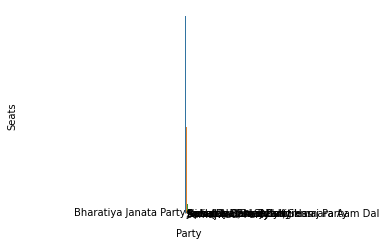

Visualizing data for Goa : S05
Importing Goa.csv
                       Party  Seats
0     Bharatiya Janata Party     20
1   Indian National Congress     11
2                Independent      3
3            Aam Aadmi Party      2
4   Maharashtrawadi Gomantak      2
5          Goa Forward Party      1
6  Revolutionary Goans Party      1


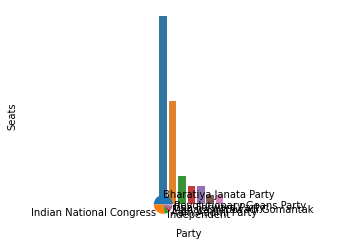

Visualizing data for Mainpur : S14
Importing Mainpur.csv
                      Party  Seats
0    Bharatiya Janata Party     32
1   National People's Party      7
2      Janata Dal  (United)      6
3  Indian National Congress      5
4        Naga Peoples Front      5
5               Independent      3
6    Kuki People’s Alliance      2


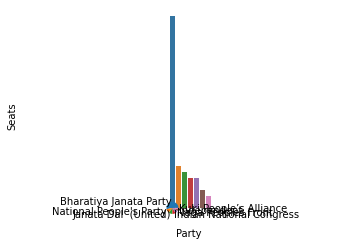

Visualizing data for Punjab : S19
Importing Punjab.csv
                      Party  Seats
0           Aam Aadmi Party     92
1  Indian National Congress     18
2       Shiromani Akali Dal      3
3    Bharatiya Janata Party      2
4       Bahujan Samaj Party      1
5               Independent      1


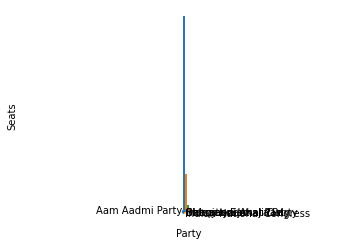

Visualizing data for Uttar-Khand : S28
Importing Uttar-Khand.csv
                      Party  Seats
0    Bharatiya Janata Party     47
1  Indian National Congress     19
2       Bahujan Samaj Party      2
3               Independent      2


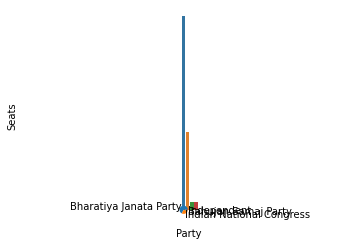

In [19]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


header = ['Party', 'Won', 'Leading', 'Total']
states = { 'Uttar-Pradesh' : 'S24', 'Goa' : 'S05', 'Mainpur' : 'S14', 'Punjab' : 'S19', 'Uttar-Khand' : 'S28' }


def visualize(input_states):
    for state in input_states:
        print("Visualizing data for", state, ":", input_states[state])
        try:
            filename = state + ".csv"
            print("Importing", filename)
            csv_data = pd.read_csv(filename)
            csv_data = csv_data.groupby('Party')['Won'].sum().sort_values(ascending=False) 
            csv_data = csv_data.reset_index()
            csv_data.columns = ['Party' ,'Seats']
            print(csv_data)
            plt.figure(state)
            sns.barplot(data=csv_data, x='Party', y='Seats')
            plt.xticks(rotation=90)
            plt.pie(csv_data["Seats"], labels=csv_data["Party"])
            plt.axis('equal')
            plt.figure(state)
            plt.show()
        except e:
            print(e)


visualize(states)